In [1]:
from analytics_workbench.read_data import DataReader
from analytics_workbench.preprocessing import PreProcessor
from analytics_workbench.unsupervised_learning import Unsupervised
from analytics_workbench.supervised_learning import ClassificationModelCV
from analytics_workbench.model_diagnostics import ClassificationModelDiagnotstics

In [2]:
reader = DataReader()
df = reader.read_csv('/home/madan/Desktop/joswin_bck/toPendrive/works/chargebee_works/nlp-intelligence/scoring_lists/tradegecko_jan31/tradegecko_jan31_website_text_file.csv',names=['website','website_text'])
df = df.fillna('')
df.shape

(349, 2)

In [3]:
df.head()

,website,website_text
0,http://www.3penterprise.co.uk,3p Enterprise Ltd - UK Distributors of Premium...
1,http://www.davisworld.com,Best Organic Mattress Furniture Store - San Di...
2,http://www.alessandragold.com,This page is offline.\nThis page is offline.\n...
3,http://www.americansuitstore.com,"American Suit Store, Online Clothing Store - M..."
4,http://www.astheygrowresaleshop.com,astheygrowresaleshop.com\nWelcome to\nastheygr...


In [11]:
preprocessor = PreProcessor()
text_cols = ['website_text']
categorical_cols = []
numeric_cols = []
X,column_names = preprocessor.build_matrix_train(df,text_cols=text_cols,categorical_cols=categorical_cols,
                   numeric_cols=numeric_cols,vectorizer_type='Count',synonym_loc=None,
                   stem_type=None,phrase_generation=False,
                    stop_words_loc='/home/madan/Desktop/joswin_bck/toPendrive/works/chargebee_works/nlp-intelligence/scoring_lists/tradegecko_jan31/stopwords.txt',
                    lower=True,n_gram_range=(1,2),
                   max_df=0.9,min_df=0.05,vocabulary_loc=None,sparse_format=True,scaling=None)

In [13]:
unsup_obj = Unsupervised()
topic_extr_obj, X_transformed =  unsup_obj.generate_topics(X,feature_names=column_names,algorithm='lda',
                                                           n_topics=20,n_top_words=20)

Topic #0:
add, wishlist, cart, add cart, compare, add wishlist, usd, size, glass, added, product, price, plastic, none, used, accessories, browse, food, equipment, black
Topic #1:
mens, options, shirts, dress, pants, select, big, sizes, love, clothing, view, add, choose, outerwear, compare, blog, contact, button, check, quality
Topic #2:
quick view, quick, choose, view, options, wish, north, face, bottoms, shirts, shirt, tees, sale, shoes, pants, account, tops, boots, categories, love
Topic #3:
back, cash, contact, store, home, new, shop, information, service, gifts, see, price, style, products, product, privacy, save, terms, account, site
Topic #4:
accessories, view, shop, bags, products, new, quick, dresses, dress, price, women, clothing, shoes, tops, black, details, cart, size, contact, one
Topic #5:
bag, leather, women, bags, view, clothing, jewelry, quick, level, quick view, shoes, great, love, small, travel, warm, service, top, search, zip
Topic #6:
size, shopify, id, inventory, 

In [17]:
df['online_shopping_score'] = X_transformed[:,0]

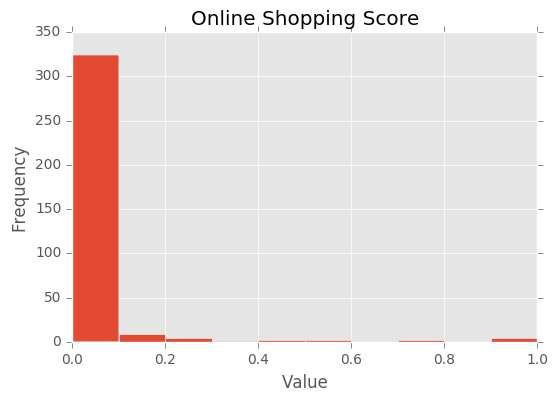

In [19]:
import matplotlib.pyplot as plt
plt.hist(df['online_shopping_score'])
plt.title("Online Shopping Score")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [25]:
from analytics_workbench.misc import ScoreBinner
import analytics_workbench.misc
reload(analytics_workbench.misc)
df['score_bin'] = analytics_workbench.misc.ScoreBinner(df['online_shopping_score']).transform(df['online_shopping_score'])

In [27]:
df[['website','online_shopping_score','score_bin']].to_excel('/home/madan/Desktop/joswin_bck/toPendrive/works/chargebee_works/nlp-intelligence/scoring_lists/tradegecko_jan31/tradegecko_jan31_ecom_score_test1.xls',index=False)